In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 数据导入

In [2]:
w = pd.read_csv('../data/bike_od.csv')
print(w.shape) # 查看数据大小
w.head()

(99999, 9)


,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis
0,7f508e26ae95478ac8b7cda2d88b4424,f52411b549236c64cbfad398527b06f0,2017-10-01 07:53:37,104.039897,30.525454,2017-10-01 07:56:25,104.042991,30.525805,299.481524
1,48bdf631eae97a0b7e6dddb9bd672491,f52411b549236c64cbfad398527b06f0,2017-10-01 17:54:15,103.877410,30.560417,2017-10-01 17:57:43,103.877011,30.560110,51.222150
2,56f6e3d6c92224aa58f5fb82a33d2ac5,f52411b549236c64cbfad398527b06f0,2017-10-01 08:31:24,104.073352,30.667557,2017-10-01 08:31:32,104.073372,30.667488,7.886066
3,b1398642247778f83470f09e923163f3,f52411b549236c64cbfad398527b06f0,2017-10-01 16:21:33,104.105804,30.680654,2017-10-01 16:27:42,104.100628,30.681912,515.202671
4,2fd5d6e292aad0c661c9e6480d4b9edc,f52411b549236c64cbfad398527b06f0,2017-10-01 22:36:45,104.064834,30.688940,2017-10-01 22:45:41,104.064870,30.689018,9.309940


### 问题1：查看用户87347011edded1387ca0cef5a7bdea28的骑行大于20m的数据数据

In [4]:
w[(w.user=='87347011edded1387ca0cef5a7bdea28') & (w.dis>20)]

,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis
24257,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 11:52:19,103.958563,30.688981,2017-10-01 12:02:15,103.958708,30.688565,48.166572
61397,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 17:07:51,103.958046,30.689294,2017-10-01 17:08:04,103.958251,30.689333,20.111820


### 问题2. 用户总量是多少？最大骑行次数？最小骑行次数？用`df['A'].value_counts()`函数完成

In [5]:
w.user.nunique()

25779

In [8]:
t = w.user.value_counts()
t

e10be3d518b3d2dfaf04462847cbd16c    90
1dfc752e7b8392c81d54ecb88312e80e    72
6381f2120d1fa9811a4473c78f9fdf55    67
7263e7ec310edfb06f2bd83ad3f9ff4e    62
8e3dbab5841a7d449bfb8f8c2bf078f1    60
                                    ..
67358df39a1a1e808116500c403dacf2     1
bc47148ef502712df33e8ebbb0a7a089     1
6abe7e5bb879857d3c1db646408a472a     1
4c63719b9b56b2c89fd35e98bf994e6f     1
adc1028238b0982c035768eefdc6e4c5     1
Name: user, Length: 25779, dtype: int64

In [10]:
print('最大次数：{}，最小次数：{}'.format(t[0], t[-1]))

最大次数：90，最小次数：1


### 问题3：用户的平均骑行次数？

In [12]:
print('平均骑行次数为：{:.2f}'.format(t.mean()))

平均骑行次数为：3.88


### 问题4：用户的平均骑行距离？

In [13]:
w.dis.mean()

285.00888228855973

### 问题5：有多少平台，每个平台的骑行数量分布？ 百分数占比？

In [14]:
w.platform.nunique()

12

In [15]:
w.platform.value_counts()

f52411b549236c64cbfad398527b06f0    88780
24128e85e41d2d37218f2a01b6817a81    10012
84a42f2803c8de332042416550990d36      531
437a670396979416774414d239726485      260
230cb4fc9919b9989dd4b45823efa609      214
6ee5fe228323d6508c8d42abf043071f      111
343f5a26aff53f87682ac055fc062833       51
a1610f8f823abae6056b26ae35703e42       29
6dfe349b21ab8c07e80489685603a941        6
616fcdf309684c2b2ed0f5174a6ccdb8        2
8149f20db762c2d0194b8f58ae9309f4        2
218eadaf5f19a61939805f60ebfefac1        1
Name: platform, dtype: int64

In [16]:
w.platform.value_counts(normalize=True)

f52411b549236c64cbfad398527b06f0    0.887809
24128e85e41d2d37218f2a01b6817a81    0.100121
84a42f2803c8de332042416550990d36    0.005310
437a670396979416774414d239726485    0.002600
230cb4fc9919b9989dd4b45823efa609    0.002140
6ee5fe228323d6508c8d42abf043071f    0.001110
343f5a26aff53f87682ac055fc062833    0.000510
a1610f8f823abae6056b26ae35703e42    0.000290
6dfe349b21ab8c07e80489685603a941    0.000060
616fcdf309684c2b2ed0f5174a6ccdb8    0.000020
8149f20db762c2d0194b8f58ae9309f4    0.000020
218eadaf5f19a61939805f60ebfefac1    0.000010
Name: platform, dtype: float64

### 问题6：增加一列，名称为hour(以开始时间为准)，表示小时，统计每小时的骑行用户数量，统计每小时的骑行总量，并可视化
提示：
* 思路1：数据导入时，数据列为字符串，可以根据小时在字符串的位置提取小时特征
* 思路2：用pd.to_datetime(df.A)，将A列转化为时间格式，之后针对每个单元数据i,可以使用i.hour提取小时特征

```
w['start_time'] = pd.to_datetime(w['start_time'])
w.start_time[0].hour
```

In [17]:
w['hour'] = pd.to_datetime(w.start_time).map(lambda i: i.hour)
w.head()

,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis,hour
0,7f508e26ae95478ac8b7cda2d88b4424,f52411b549236c64cbfad398527b06f0,2017-10-01 07:53:37,104.039897,30.525454,2017-10-01 07:56:25,104.042991,30.525805,299.481524,7
1,48bdf631eae97a0b7e6dddb9bd672491,f52411b549236c64cbfad398527b06f0,2017-10-01 17:54:15,103.877410,30.560417,2017-10-01 17:57:43,103.877011,30.560110,51.222150,17
2,56f6e3d6c92224aa58f5fb82a33d2ac5,f52411b549236c64cbfad398527b06f0,2017-10-01 08:31:24,104.073352,30.667557,2017-10-01 08:31:32,104.073372,30.667488,7.886066,8
3,b1398642247778f83470f09e923163f3,f52411b549236c64cbfad398527b06f0,2017-10-01 16:21:33,104.105804,30.680654,2017-10-01 16:27:42,104.100628,30.681912,515.202671,16
4,2fd5d6e292aad0c661c9e6480d4b9edc,f52411b549236c64cbfad398527b06f0,2017-10-01 22:36:45,104.064834,30.688940,2017-10-01 22:45:41,104.064870,30.689018,9.309940,22


In [19]:
hour_count = w.hour.value_counts()
hour_count

9     6959
11    6361
10    6282
8     6230
13    5942
18    5918
14    5914
17    5840
12    5781
19    5464
16    5463
15    5181
20    4862
7     4241
21    4191
0     3330
22    2974
6     2012
1     1604
2     1191
5     1168
23    1083
3     1065
4      943
Name: hour, dtype: int64

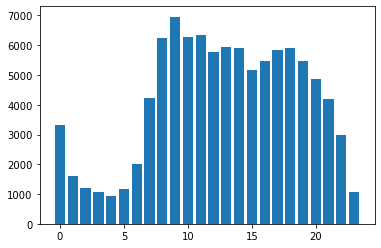

In [22]:
plt.bar(hour_count.index, hour_count.values)
plt.show()

### 问题7：统计每个平台每小时的出行量，并进行可视化（折线图）
提示，用下面的代码画多条折线图：
```
platforms = df.platform.unique()
for p in platforms:
    data = df[df.platform==p]
    plt.plot(data.hour, data.n)  # 循环，每次画一个平台的折线图
plt.show()
```

In [25]:
df = w.groupby(['platform', 'hour']).apply(len).to_frame('n').reset_index()
df

,platform,hour,n
0,218eadaf5f19a61939805f60ebfefac1,12,1
1,230cb4fc9919b9989dd4b45823efa609,0,9
2,230cb4fc9919b9989dd4b45823efa609,1,2
3,230cb4fc9919b9989dd4b45823efa609,3,1
4,230cb4fc9919b9989dd4b45823efa609,4,2
...,...,...,...
171,f52411b549236c64cbfad398527b06f0,19,4888
172,f52411b549236c64cbfad398527b06f0,20,4305
173,f52411b549236c64cbfad398527b06f0,21,3684
174,f52411b549236c64cbfad398527b06f0,22,2576


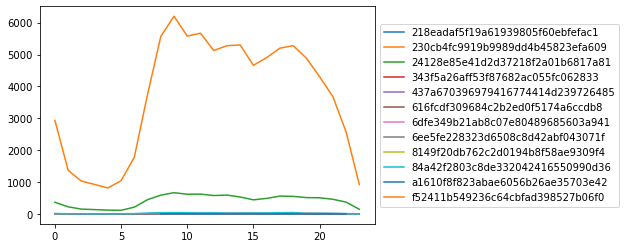

In [29]:
for p in df.platform.unique():
    data = df[df.platform==p]
    plt.plot(data.hour, data.n, label=p)  # 循环，每次画一个平台的折线图
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 问题8：用户的平均骑行时间？
提示：将start_time和end_time列转为时间格式，之后求时间差值

```
w['start_time'] = pd.to_datetime(w['start_time'])
w['end_time'] = pd.to_datetime(w['end_time'])
delta = w.end_time[0] - w.start_time[0]
delta.seconds  # 返回间隔的秒数
```

In [32]:
w['delta_time'] = pd.to_datetime(w.end_time) - pd.to_datetime(w.start_time)
w['delta_time'] = w['delta_time'].map(lambda i: i.seconds/60)
w.head()

,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis,hour,delta_time
0,7f508e26ae95478ac8b7cda2d88b4424,f52411b549236c64cbfad398527b06f0,2017-10-01 07:53:37,104.039897,30.525454,2017-10-01 07:56:25,104.042991,30.525805,299.481524,7,2.800000
1,48bdf631eae97a0b7e6dddb9bd672491,f52411b549236c64cbfad398527b06f0,2017-10-01 17:54:15,103.877410,30.560417,2017-10-01 17:57:43,103.877011,30.560110,51.222150,17,3.466667
2,56f6e3d6c92224aa58f5fb82a33d2ac5,f52411b549236c64cbfad398527b06f0,2017-10-01 08:31:24,104.073352,30.667557,2017-10-01 08:31:32,104.073372,30.667488,7.886066,8,0.133333
3,b1398642247778f83470f09e923163f3,f52411b549236c64cbfad398527b06f0,2017-10-01 16:21:33,104.105804,30.680654,2017-10-01 16:27:42,104.100628,30.681912,515.202671,16,6.150000
4,2fd5d6e292aad0c661c9e6480d4b9edc,f52411b549236c64cbfad398527b06f0,2017-10-01 22:36:45,104.064834,30.688940,2017-10-01 22:45:41,104.064870,30.689018,9.309940,22,8.933333


In [35]:
print('用户平均骑行时间为：{:.2f} min'.format(w.delta_time.mean()))

用户平均骑行时间为：11.93 min


### 问题9：导出骑行距离大于1km，或骑行时间大于2分钟的所有记录到../data/out.xlsx文件

In [36]:
df2 = w[(w.dis>1000) | (w.delta_time>2)]
df2

,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis,hour,delta_time
0,7f508e26ae95478ac8b7cda2d88b4424,f52411b549236c64cbfad398527b06f0,2017-10-01 07:53:37,104.039897,30.525454,2017-10-01 07:56:25,104.042991,30.525805,299.481524,7,2.800000
1,48bdf631eae97a0b7e6dddb9bd672491,f52411b549236c64cbfad398527b06f0,2017-10-01 17:54:15,103.877410,30.560417,2017-10-01 17:57:43,103.877011,30.560110,51.222150,17,3.466667
3,b1398642247778f83470f09e923163f3,f52411b549236c64cbfad398527b06f0,2017-10-01 16:21:33,104.105804,30.680654,2017-10-01 16:27:42,104.100628,30.681912,515.202671,16,6.150000
4,2fd5d6e292aad0c661c9e6480d4b9edc,f52411b549236c64cbfad398527b06f0,2017-10-01 22:36:45,104.064834,30.688940,2017-10-01 22:45:41,104.064870,30.689018,9.309940,22,8.933333
5,b5620d47609600e68f35fd7d206f4a9a,f52411b549236c64cbfad398527b06f0,2017-10-01 20:11:17,103.899911,30.571207,2017-10-01 20:14:06,103.902356,30.574851,467.130693,20,2.816667
...,...,...,...,...,...,...,...,...,...,...,...
99991,89bd7e18dd8d75ad5f2c61e877c80356,f52411b549236c64cbfad398527b06f0,2017-10-01 07:40:23,103.845124,30.689151,2017-10-01 07:53:51,103.845092,30.689085,7.933433,7,13.466667
99992,adc1028238b0982c035768eefdc6e4c5,f52411b549236c64cbfad398527b06f0,2017-10-01 21:29:00,104.103978,30.627763,2017-10-01 21:38:43,104.103250,30.625037,310.167864,21,9.716667
99994,60b051cbb4f015f1373065039c9cf84f,f52411b549236c64cbfad398527b06f0,2017-10-01 16:22:33,104.088077,30.638135,2017-10-01 16:24:52,104.088128,30.638262,14.904313,16,2.316667
99995,6992ff6b845fbd74c44ed4a285015d0b,f52411b549236c64cbfad398527b06f0,2017-10-01 20:40:59,104.080110,30.621610,2017-10-01 20:47:39,104.074831,30.620604,518.291148,20,6.666667


In [37]:
df2.to_excel('../data/out.xlsx', index=False)